<a href="https://colab.research.google.com/github/MdSyfulIslam/CSE-412-Machine-Learning-Lab/blob/main/CLP_MLP_Classifire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [30]:

X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

iris = load_iris()
X_iris, y_iris = iris.data, iris.target

print("XOR Dataset:\n", X_xor, y_xor)
print("\nIris Dataset Shape:", X_iris.shape, y_iris.shape)



XOR Dataset:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 1 1 0]

Iris Dataset Shape: (150, 4) (150,)


In [31]:
def run_experiment(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    activations = ['logistic', 'tanh', 'relu']
    learning_rates = [0.0001, 0.001, 0.01, 0.1]
    hidden_neurons_list = [2, 3, 5, 10]

    best_setup = None
    best_acc = 0

    for act in activations:
        for lr in learning_rates:
            for hn in hidden_neurons_list:
                clf = MLPClassifier(hidden_layer_sizes=(hn,), activation=act,
                                     learning_rate_init=lr, max_iter=500, random_state=42)
                clf.fit(X_train, y_train)

                train_acc = accuracy_score(y_train, clf.predict(X_train))
                test_acc = accuracy_score(y_test, clf.predict(X_test))

                print(f"{dataset_name} | Act={act}, LR={lr}, HN={hn} | Train={train_acc:.2f}, Test={test_acc:.2f}")

                if test_acc > best_acc:
                    best_acc = test_acc
                    best_setup = (act, lr, hn)

                if act == 'relu' and lr == 0.01 and hn == 5:
                    cm = confusion_matrix(y_test, clf.predict(X_test))
                    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                    disp.plot()
                    plt.title(f"{dataset_name} - Confusion Matrix (relu, 0.01, hn=5)")
                    plt.show()

                    plt.plot(clf.loss_curve_)
                    plt.title(f"{dataset_name} - Loss Curve (relu, 0.01, hn=5)")
                    plt.xlabel("Iterations")
                    plt.ylabel("Loss")
                    plt.show()

    print(f"Best Setup for {dataset_name}: Activation={best_setup[0]}, LR={best_setup[1]}, HN={best_setup[2]}, Test Acc={best_acc:.2f}")



XOR Dataset (Binary) | Act=logistic, LR=0.0001, HN=2 | Train=0.50, Test=0.50
XOR Dataset (Binary) | Act=logistic, LR=0.0001, HN=3 | Train=0.50, Test=0.50
XOR Dataset (Binary) | Act=logistic, LR=0.0001, HN=5 | Train=0.50, Test=0.50
XOR Dataset (Binary) | Act=logistic, LR=0.0001, HN=10 | Train=0.50, Test=0.50
XOR Dataset (Binary) | Act=logistic, LR=0.001, HN=2 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=logistic, LR=0.001, HN=3 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=logistic, LR=0.001, HN=5 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=logistic, LR=0.001, HN=10 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=logistic, LR=0.01, HN=2 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=logistic, LR=0.01, HN=3 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=logistic, LR=0.01, HN=5 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=logistic, LR=0.01, HN=10 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=logistic, LR=0.1, HN=2 | Train=1.00, Test=0.00
XOR Dataset

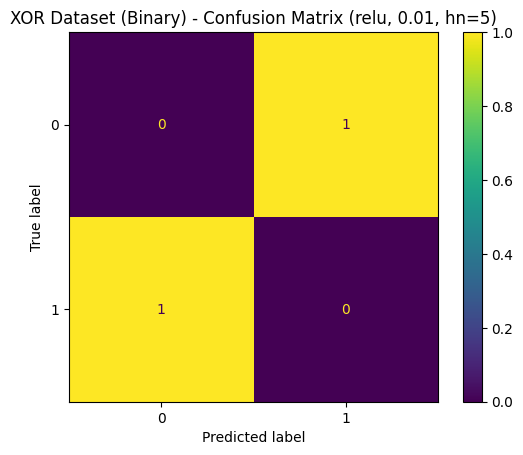

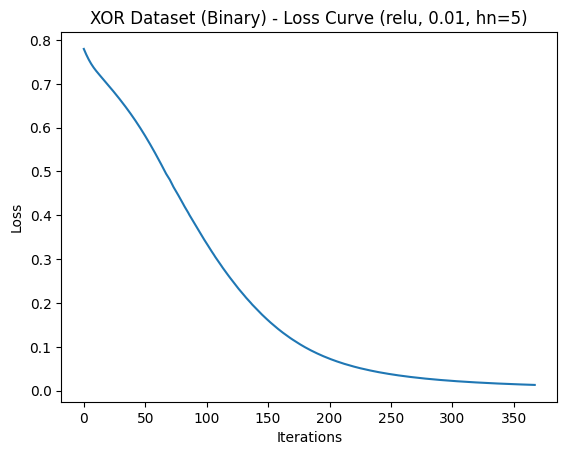

XOR Dataset (Binary) | Act=relu, LR=0.01, HN=10 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=relu, LR=0.1, HN=2 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=relu, LR=0.1, HN=3 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=relu, LR=0.1, HN=5 | Train=1.00, Test=0.00
XOR Dataset (Binary) | Act=relu, LR=0.1, HN=10 | Train=1.00, Test=0.00
Best Setup for XOR Dataset (Binary): Activation=relu, LR=0.0001, HN=3, Test Acc=1.00


In [32]:
run_experiment(X_xor, y_xor, "XOR Dataset (Binary)")



Iris Dataset (Multi-Class) | Act=logistic, LR=0.0001, HN=2 | Train=0.35, Test=0.29
Iris Dataset (Multi-Class) | Act=logistic, LR=0.0001, HN=3 | Train=0.35, Test=0.29
Iris Dataset (Multi-Class) | Act=logistic, LR=0.0001, HN=5 | Train=0.35, Test=0.29
Iris Dataset (Multi-Class) | Act=logistic, LR=0.0001, HN=10 | Train=0.35, Test=0.29
Iris Dataset (Multi-Class) | Act=logistic, LR=0.001, HN=2 | Train=0.65, Test=0.71
Iris Dataset (Multi-Class) | Act=logistic, LR=0.001, HN=3 | Train=0.83, Test=0.84
Iris Dataset (Multi-Class) | Act=logistic, LR=0.001, HN=5 | Train=0.89, Test=0.84
Iris Dataset (Multi-Class) | Act=logistic, LR=0.001, HN=10 | Train=0.96, Test=0.98
Iris Dataset (Multi-Class) | Act=logistic, LR=0.01, HN=2 | Train=0.61, Test=0.69
Iris Dataset (Multi-Class) | Act=logistic, LR=0.01, HN=3 | Train=0.98, Test=1.00
Iris Dataset (Multi-Class) | Act=logistic, LR=0.01, HN=5 | Train=0.97, Test=1.00
Iris Dataset (Multi-Class) | Act=logistic, LR=0.01, HN=10 | Train=0.97, Test=1.00
Iris Dataset 

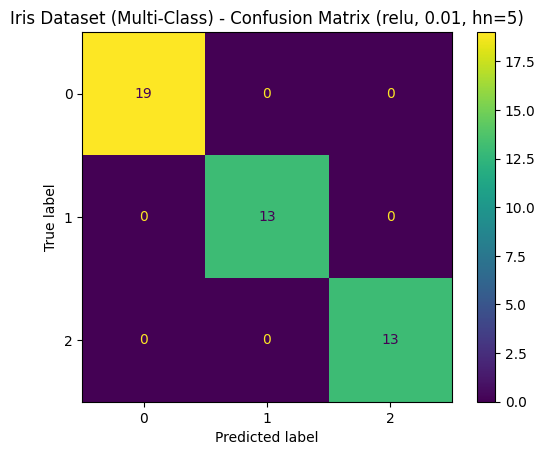

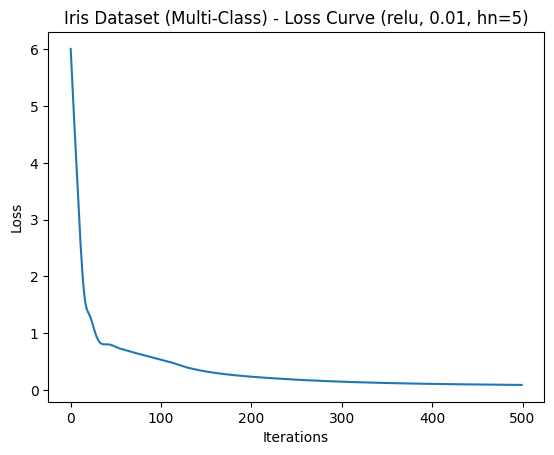

Iris Dataset (Multi-Class) | Act=relu, LR=0.01, HN=10 | Train=0.97, Test=1.00
Iris Dataset (Multi-Class) | Act=relu, LR=0.1, HN=2 | Train=0.65, Test=0.71
Iris Dataset (Multi-Class) | Act=relu, LR=0.1, HN=3 | Train=0.97, Test=0.98
Iris Dataset (Multi-Class) | Act=relu, LR=0.1, HN=5 | Train=0.98, Test=1.00
Iris Dataset (Multi-Class) | Act=relu, LR=0.1, HN=10 | Train=0.97, Test=0.98
Best Setup for Iris Dataset (Multi-Class): Activation=logistic, LR=0.01, HN=3, Test Acc=1.00


In [33]:
run_experiment(X_iris, y_iris, "Iris Dataset (Multi-Class)")
